In [1]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = np.loadtxt(r'assets\spiral.csv', delimiter=',')
data

array([[ 15.40724,  -3.66801,   1.     ],
       [ 15.07298,  -1.56346,   1.     ],
       [-15.43986,   0.16502,  -1.     ],
       ...,
       [ -6.41697,   5.92464,   1.     ],
       [  5.00793,  -5.7493 ,  -1.     ],
       [  6.96596,  -6.47686,  -1.     ]], shape=(2000, 3))

In [3]:
X = np.array(data[:, :2].T)
Y = np.array(data[:, 2].T)

In [7]:
# for x in list(X):
#     print(x)
# print(Y)

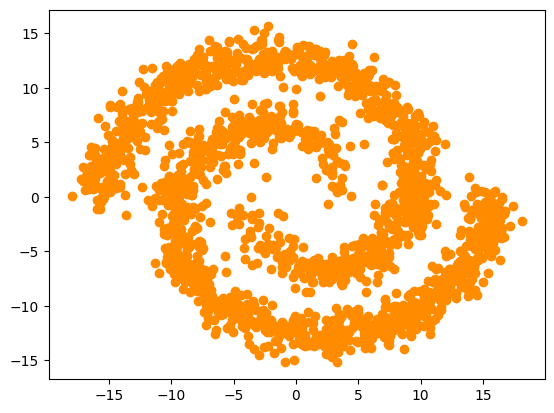

In [4]:
plt.scatter(X[0], X[1], color='darkorange')

In [5]:
p, N = X.shape
# print (p, N)

In [6]:
X = np.concatenate((-np.ones((1, N)), X))

In [11]:
# for x in list(X):
#     print(x)

In [7]:
Y = Y.astype(int)

In [8]:
def sinal(u_t):
    return np.where(u_t >= 0, 1, -1)

In [9]:
rodadas = 500

In [10]:
acuracias = []
sensibilidade = []
especificidade = []
matrizes_de_confusao = []

In [22]:
for i in range(rodadas):
    print(f"Calculando: {i+1}/{rodadas}", end='\r')

    # Adicionar w0 aleatório
    W = np.random.random_sample((p+1, 1))

    # Separação do conjunto de dados em treino e teste
    seed = np.random.permutation(N)
    Xr = X[:, seed]
    yr = Y[seed]

    treino_size = int(N * 0.8)
    X_treino, y_treino = Xr[:, :treino_size], yr[:treino_size]
    X_teste, y_teste = Xr[:, treino_size:], yr[treino_size:]

    # Treinamento do modelo
    aprendizado = 0.01
    for _ in range(1000):  # Limite de 1000 épocas
        u = W.T @ X_treino  # Saída para todas as amostras
        y_pred = sinal(u).flatten()  # Previsão vetorizada
        erros = y_treino - y_pred
        if not np.any(erros):  # Se não houver erro, pare o treinamento
            break
        W += aprendizado * (X_treino @ erros.reshape(-1, 1)) / treino_size

    # Teste do modelo
    u_teste = W.T @ X_teste
    Y_predito = sinal(u_teste).flatten()

    # Métricas
    acertos = np.sum(Y_predito == y_teste)
    acuracias.append(acertos / len(y_teste))

    matriz_confusao = np.array([[0, 0], [0, 0]])
    for j in range(len(y_teste)):
        if Y_predito[j] == 1 and y_teste[j] == 1:
            matriz_confusao[0, 0] += 1  # Verdadeiro positivo (TP)
        elif Y_predito[j] == -1 and y_teste[j] == -1:
            matriz_confusao[1, 1] += 1  # Verdadeiro negativo (TN)
        elif Y_predito[j] == 1 and y_teste[j] == -1:
            matriz_confusao[0, 1] += 1  # Falso positivo (FP)
        elif Y_predito[j] == -1 and y_teste[j] == 1:
            matriz_confusao[1, 0] += 1  # Falso negativo (FN)

    # Sensibilidade e especificidade
    TP = matriz_confusao[0, 0]
    TN = matriz_confusao[1, 1]
    FP = matriz_confusao[0, 1]
    FN = matriz_confusao[1, 0]

    sensibilidade.append(TP / (TP + FN) if (TP + FN) > 0 else 0)
    especificidade.append(TN / (TN + FP) if (TN + FP) > 0 else 0)
    matrizes_de_confusao.append(matriz_confusao)

In [24]:
# Encontrar as rodadas de maior e menor acurácia
rodada_max_acuracia = np.argmax(acuracias)
rodada_min_acuracia = np.argmin(acuracias)

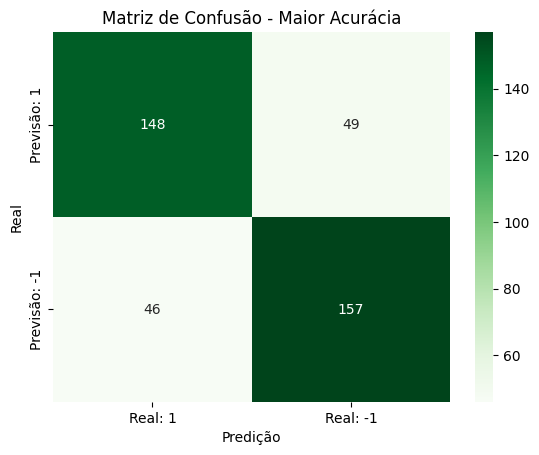

In [27]:
sns.heatmap(matrizes_de_confusao[rodada_max_acuracia], annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Real: 1', 'Real: -1'], yticklabels=['Previsão: 1', 'Previsão: -1'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Maior Acurácia')
plt.show()

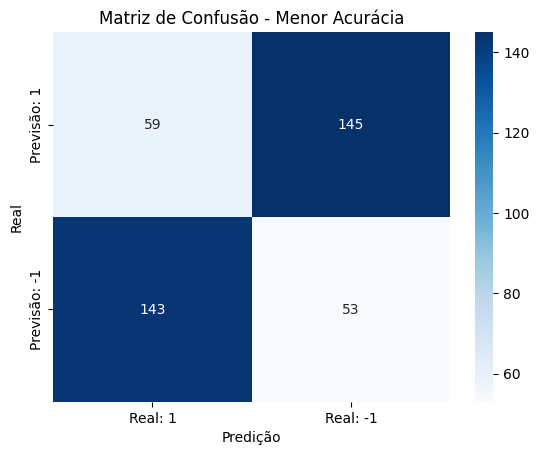

In [28]:
sns.heatmap(matrizes_de_confusao[rodada_min_acuracia], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Real: 1', 'Real: -1'], yticklabels=['Previsão: 1', 'Previsão: -1'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Menor Acurácia')
plt.show()

In [29]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [30]:
print(
f'''Acurácia
    Média: {np.mean(acuracias):.4f} 
    DP: {np.std(acuracias):.4f}
    Maior valor: {np.max(acuracias):.4f}
    Menor valor: {np.min(acuracias):.4f}''', end='\n\n')

print(
f'''Sensibilidade
    Média: {np.mean(sensibilidade):.4f}
    DP: {np.std(sensibilidade):.4f}
    Maior valor: {np.max(sensibilidade):.4f}
    Menor valor: {np.min(sensibilidade):.4f}''', end='\n\n')

print(
f'''Especificidade
    Média: {np.mean(especificidade):.4f}
    DP: {np.std(especificidade):.4f}
    Maior valor: {np.max(especificidade):.4f}
    Menor valor: {np.min(especificidade):.4f}''', end='\n\n')

Acurácia
    Média: 0.6178 
    DP: 0.0645
    Maior valor: 0.7625
    Menor valor: 0.2800

Sensibilidade
    Média: 0.6180
    DP: 0.0691
    Maior valor: 0.7802
    Menor valor: 0.2911

Especificidade
    Média: 0.6179
    DP: 0.0685
    Maior valor: 0.7950
    Menor valor: 0.2287

